In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


## Profiling Report
import pandas_profiling as pp
# DATA VISUALIZATION
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pylab import rcParams
import seaborn as sns

#scikit learn libraries
#Lineaer Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Tree
from sklearn.tree import DecisionTreeClassifier

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Feature Selection
from sklearn.feature_selection import SelectFromModel

##  esemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

#TREE
from sklearn import tree

#XGBOOST
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 
from xgboost import plot_importance
from xgboost import plot_tree

#eli5
import eli5
from eli5.sklearn import PermutationImportance

## Gridsearch
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ace-class-assignment/Test.csv
/kaggle/input/ace-class-assignment/AMP_TrainSet.csv


In [5]:
## Loading the datasets

Train = pd.read_csv("../input/ace-class-assignment/AMP_TrainSet.csv")
Test = pd.read_csv("../input/ace-class-assignment/Test.csv")

## Taking a preview of the data
Train.head()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


# Profiling Report

In [ ]:
Report = pp.ProfileReport(Train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
Report.to_notebook_iframe()
#Report.to_widgets()

In [6]:
## Loking at the dimensions of the dataset

Train.shape,Test.shape

((3038, 12), (758, 11))

In [7]:
## Looking for misssing and null values
Train.isnull().any().sum()

0

In [8]:
## Looking the data types of the data
Train.dtypes

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

In [9]:
## Looking at the description of the data 
Train.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


## Looking at the data:
* There are two categorical features CLASS and NT_EFC195
* There is a big difference between the 75th percentile and the maximum values for columns  FULL_Charge and FULL_AcidicMolPerc
* The columns FULL_AcidicMolPerc and FULL_OOBM850104 have both negative and positive values.

In [10]:
# Looking at the ratio of the binary data for the class

All = Train.shape[0]
Positive = Train[Train['CLASS'] == 1]
Negative = Train[Train['CLASS'] == 0]

x = len(Positive)/All
y = len(Negative)/All

print('Positives :',x*100,'%')
print('Negatives :',y*100,'%')

## The sets are evenly balanced and hence there will be no need to use SMOTE OR NEAR MISS

Positives : 50.0 %
Negatives : 50.0 %


Text(0, 0.5, 'Frequency')

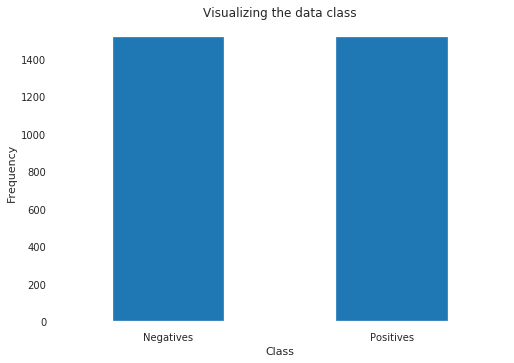

In [11]:
# Visualizing the data class
labels = ['Negatives','Positives']
classes = pd.value_counts(Train['CLASS'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Visualizing the data class")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

## Plot the distribution of features

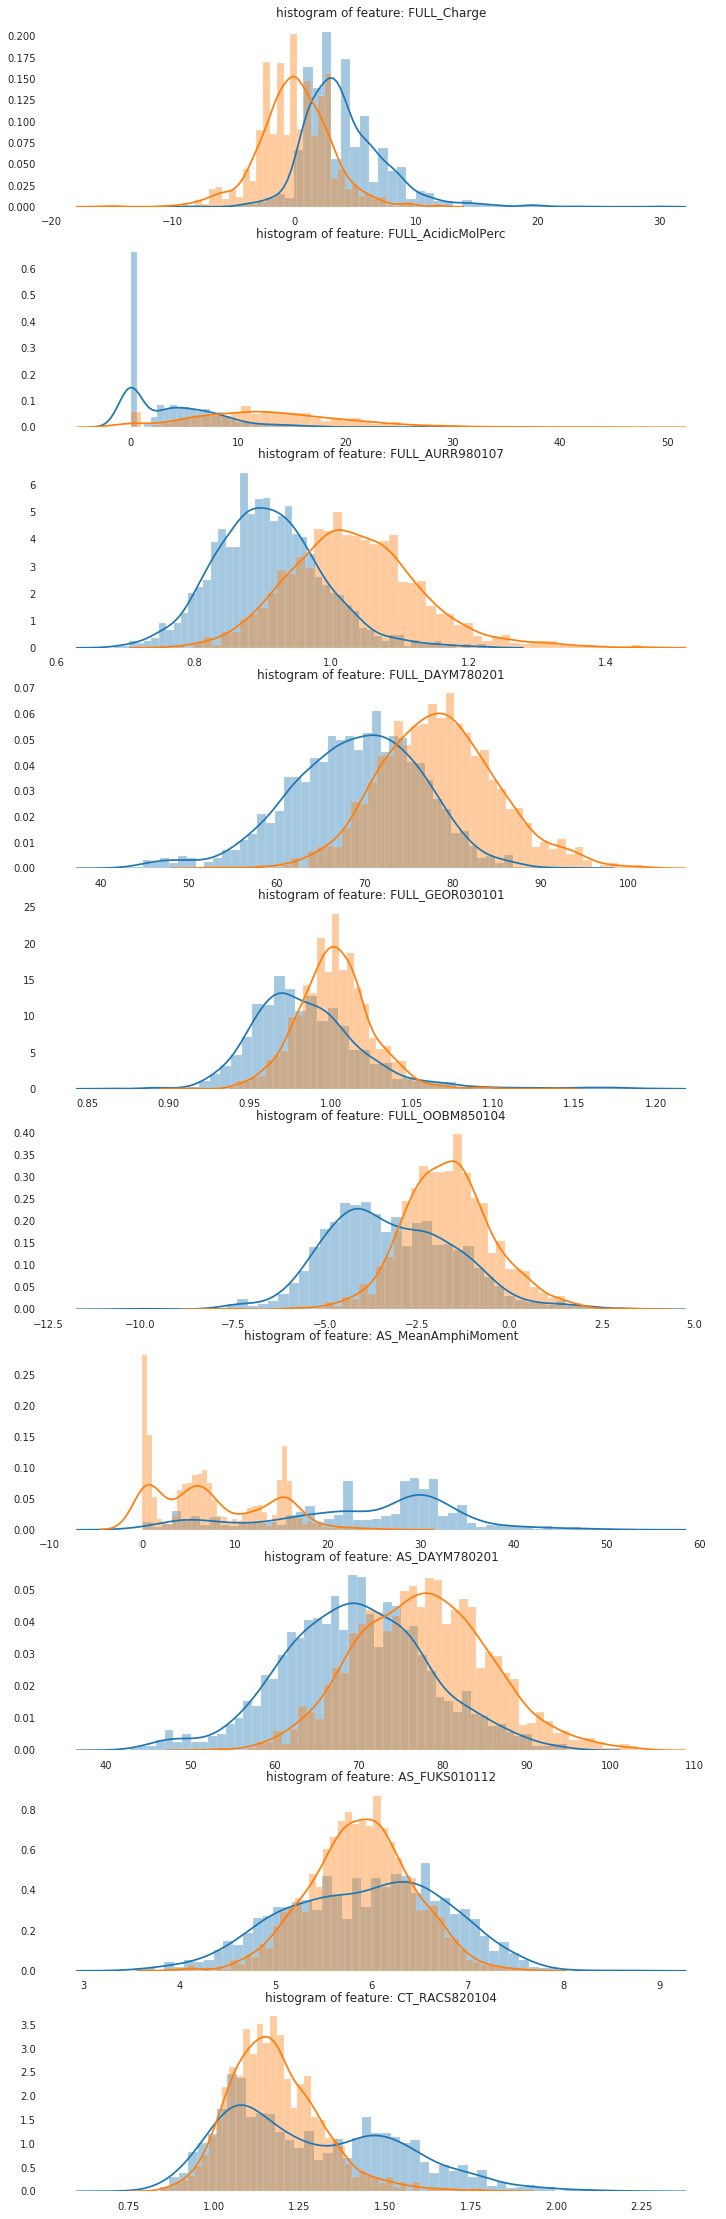

In [12]:
# distribution of features
# This feature works with numerical data not categorical data.
## Removing feature"NT_EFC195" because it is categorical
features =Train.drop(["CLASS","NT_EFC195"],axis=1).columns

plt.figure(figsize=(12,12*4))
gs = gridspec.GridSpec(12, 1)
for i, cn in enumerate(Train[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(Train[cn][Train.CLASS == 1], bins=50)
    sns.distplot(Train[cn][Train.CLASS == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [13]:

# Data splitting
X=Train.drop("CLASS",axis=1)
y=Train["CLASS"]
seed=42
# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=seed)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)
#FTest = normalize(FTest)

LR: 0.888066 (0.017245)
LDA: 0.908230 (0.014142)
KNN: 0.912757 (0.008393)
CART: 0.883539 (0.014613)
NB: 0.917284 (0.012543)
SVM: 0.897531 (0.018261)
NN: 0.908642 (0.013499)
SG: 0.891770 (0.022544)


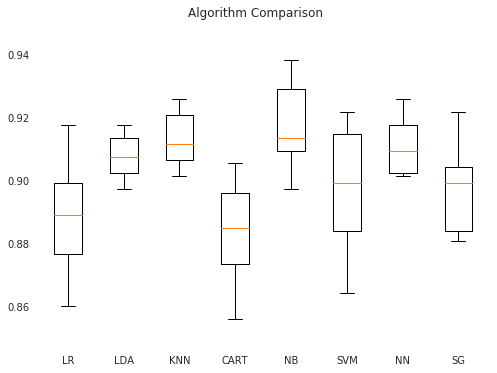

In [14]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN',MLPClassifier()))
models.append(('SG',SGDClassifier()))

# evaluate each model in turn

results = []
names = []
seed =25
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, 
    scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
#print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



# Model Evaluation


## Naive Bayes

In [15]:

NB = GaussianNB()
NB.fit(X_train,y_train)
NB_predicted_test_labels= NB.predict(X_test)

#scoring NB
NB_accuracy_score  = accuracy_score(y_test,NB_predicted_test_labels)
NB_precison_score  = precision_score(y_test,NB_predicted_test_labels)
NB_recall_score    = recall_score(y_test,NB_predicted_test_labels)
NB_f1_score        = f1_score(y_test,NB_predicted_test_labels)
NB_MCC             = matthews_corrcoef(y_test,NB_predicted_test_labels)

print("accuracy_score: {}\nprecison_score: {}\nrecall_score: {}\nf1_score: {}\nMCC: {}".format(NB_accuracy_score,NB_precison_score,NB_recall_score,NB_f1_score,NB_MCC))


accuracy_score: 0.90625
precison_score: 0.9276315789473685
recall_score: 0.889589905362776
f1_score: 0.9082125603864736
MCC: 0.8132439248274577


## K Nearest Neighbours

In [16]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predicted_test_labels = knn.predict(X_test)


#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

print("accuracy_score: {}\nprecison_score: {}\nrecall_score: {}\nf1_score: {}\nMCC: {}".format(knn_accuracy_score,knn_precison_score,knn_recall_score,knn_f1_score,knn_MCC))

accuracy_score: 0.9095394736842105
precison_score: 0.9395973154362416
recall_score: 0.8832807570977917
f1_score: 0.9105691056910569
MCC: 0.820833568880967


## Neural Networks

In [17]:
NN = MLPClassifier()
NN.fit(X_train,y_train)
NN_predicted_test_labels = NN.predict(X_test)
#scoring knn
NN_accuracy_score  = accuracy_score(y_test,NN_predicted_test_labels)
NN_precison_score  = precision_score(y_test,NN_predicted_test_labels)
NN_recall_score    = recall_score(y_test,NN_predicted_test_labels)
NN_f1_score        = f1_score(y_test,NN_predicted_test_labels)
NN_MCC             = matthews_corrcoef(y_test,NN_predicted_test_labels)

print("accuracy_score: {}\nprecison_score: {}\nrecall_score: {}\nf1_score: {}\nMCC: {}".format(NN_accuracy_score,NN_precison_score,NN_recall_score,NN_f1_score,NN_MCC))

accuracy_score: 0.90625
precison_score: 0.9166666666666666
recall_score: 0.9022082018927445
f1_score: 0.9093799682034975
MCC: 0.8123988984765811


## VOTING CLASSIFIER

#### Voting Classifier and algorithms that combines the weights of two or more algorithms and ajusts the weights of the Intercept and coeficient to give a better prediction. In This case I combined the best performing algorithms 
* NB Naive Bayes
* KNN K Nearest Neighbours
* NN Neural Networks

In [18]:
ensemble=VotingClassifier(estimators=[('NN', NN),('knn',knn),('NB',NB)], voting='hard')
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
 
    
## Scoring the Vector Claissifier   
accuracy_score  = accuracy_score(y_test,y_pred)
precison_score  = precision_score(y_test,y_pred)
recall_score    = recall_score(y_test,y_pred)
f1_score        = f1_score(y_test,y_pred)
MCC             = matthews_corrcoef(y_test,y_pred)

print("accuracy_score: {}\nprecison_score: {}\nrecall_score: {}\nf1_score: {}\nMCC: {}".format(accuracy_score,precison_score,recall_score,f1_score,MCC))

[[274  17]
 [ 37 280]]
accuracy_score: 0.9111842105263158
precison_score: 0.9427609427609428
recall_score: 0.8832807570977917
f1_score: 0.9120521172638437
MCC: 0.8243255232481822


# Testing

In [19]:

NB = GaussianNB()
NB.fit(X,y)
NB_ypred= NB.predict(Test)
fypred = pd.DataFrame(NB_ypred)
fypred.to_csv("NaiveBayes.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )
## Score 0.99559

knn= KNeighborsClassifier()
knn.fit(X,y)
knn_ypred= knn.predict(Test)
fypred = pd.DataFrame(knn_ypred)
fypred.to_csv("KNearestN.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )
## 77

## Neural Networks
NN = MLPClassifier()
NN.fit(X,y)
NN_predicted = NN.predict(Test)
fypred = pd.DataFrame(knn_ypred)
fypred.to_csv("NeuralNetworks.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )
## 77

## Voting Classifier
ensemble=VotingClassifier(estimators=[('NN', NN),('knn',knn),('NB',NB)], voting='hard')
y_pred =ensemble.fit(X,y).predict(Test)
fypred = pd.DataFrame(y_pred)
fypred.to_csv("VotingClass.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )
## 0.86494

# Model Tunning

## Principal Component Analysis


Running  clustering n a raw expression matrix can be very challenging due to the high dimentionality.
Therefore is almost recommended to perform any sort of dimentionality reduction before proceeding with cluster analysis.  Examples of clustering algorithms
* K means
* Gausian Mixture Models
* Hierarchical Clustering
* Spectral clustering
* SC3
* Boostrap Concesus Clustering
* SNN-cliq
* Seurat

In [20]:
# PCA (Principal Component Analysis) mainly using to reduce the size of the feature space while
# retaining as much of the information as possible.
# In here all the features transformed into 2 features using PCA.

X = Train.drop(['CLASS'], axis = 1)
y = Train['CLASS']

S = Test
#Sy =Test['CLASS']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalComponents_Test = pca.fit_transform(S.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf_test= pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
FTrain = pd.concat([principalDf, y], axis = 1)
FTest = pd.DataFrame(principalDf_test)
FTrain.head()
FTest.head()

,principal component 1,principal component 2
0,-6.241207,-11.675593
1,-3.903720,-15.198832
2,-5.365127,-13.831196
3,-0.317401,-17.881149
4,-3.558259,-15.424786


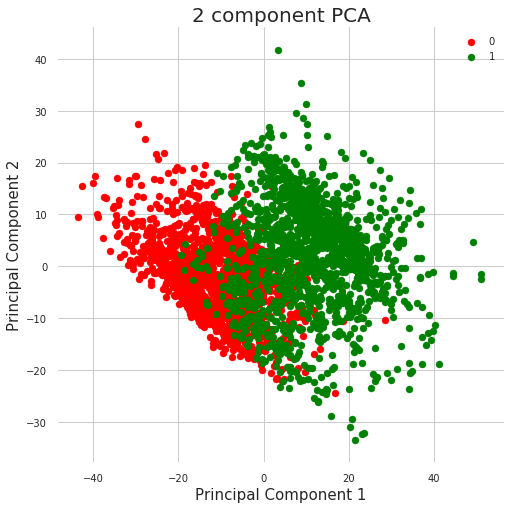

In [21]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = FTrain['CLASS'] == target
    ax.scatter(FTrain.loc[indicesToKeep, 'principal component 1']
               , FTrain.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## K Neares Neighbours with PCA

In [22]:
# K Neares Neighbours with PCA
PCA_X_Train =  FTrain.drop("CLASS",axis=1)
PCA_Y_Train = FTrain["CLASS"]

knn= KNeighborsClassifier()
knn.fit(PCA_X_Train,PCA_Y_Train)
knn_ypred= knn.predict(FTest)
fypred = pd.DataFrame(knn_ypred)
fypred.to_csv("KNearestN.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )

# XGBOOST

#### XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [23]:
param={'eta':0.3,'max_depth':3,'objective':'multi:softprob', 'num_class':3}
steps = 40
D_train = xgb.DMatrix(X_train,label=y_train)
D_test = xgb.DMatrix(X_test,label=y_test)
D_FTest = xgb.DMatrix(FTest)
XGB = xgb.train(param,D_train,steps)
##Predictions

preds =XGB.predict(D_test)
#y

best_preds =pd.DataFrame(np.asarray([np.argmax(line) for line in preds]))
#y_test=pd.DataFrame(y_test)

#accuracy_score  = accuracy_score(y_test,best_preds)
precison_score  = precision_score(y_test,best_preds)
#recall_score    = recall_score(y_test,best_preds)
#f1_score        = f1_score(y_test,best_preds)
MCC             = matthews_corrcoef(y_test,best_preds)
print(confusion_matrix(y_test,best_preds))

print("precison_score: {}\nMCC: {}".format(precison_score,MCC))


## Submition
#fpreds = XGB.predict(D_FTest.illoc[[]])
#print(fpreds)
#print(D_FTest)


[[273  18]
 [ 23 294]]
precison_score: 0.9423076923076923
MCC: 0.8650969172831277


# Feature Selection

## Visualizing Feature with Permuattion Importance & Feature weight

## Feature Importance plot

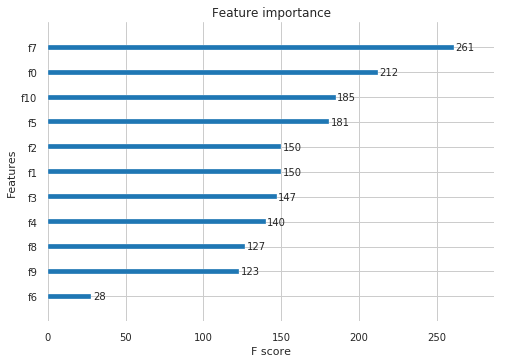

In [24]:
xgb1=XGBClassifier()
xgb1.fit(X_train,y_train)
# plot feature importance
plot_importance(xgb1)
plt.show()


## Feature weights plots

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb2 = XGBClassifier().fit(X_train, y_train)
perm = PermutationImportance(xgb2).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.1932 ± 0.0106,x7
0.0325 ± 0.0131,x0
0.0215 ± 0.0086,x1
0.0171 ± 0.0101,x5
0.0169 ± 0.0041,x4
0.0169 ± 0.0061,x3
0.0044 ± 0.0046,x10
0.0029 ± 0.0022,x2
0.0002 ± 0.0056,x9
0.0002 ± 0.0029,x6


## Ploting Descision Trees

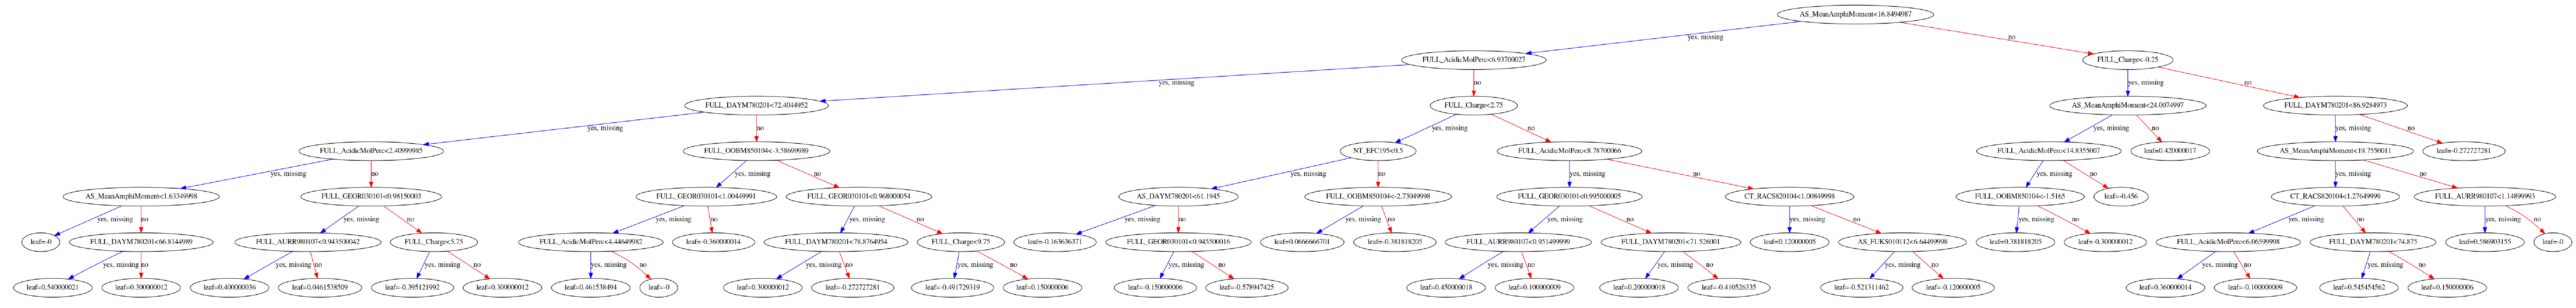

In [26]:
xgb3 = XGBClassifier().fit(X_train, y_train)
#set up the parameters
rcParams['figure.figsize'] = 150,300
plot_tree(xgb3)

# Grid Search

In [29]:
##
#This module works perfectly but i have commented it out to reduce the time required to run the jobs.

GS = xgb.XGBClassifier()
parameters={"eta":[0.05,0.10,.015,0.20,0.25,0.30],"max_depth":[3,4,5,6,8,10,12,15],"min_child_weight":[1,3,5,7],"gamma":[0.0,0.1,0.2,0.3,0.4],"colsample_bytree":[0.3,0.4,0.5,0.7]}
grid=GridSearchCV(GS,parameters,n_jobs=4,scoring="neg_log_loss",cv=3)
grid.fit(X_train,y_train)

preds = grid.predict(X_test)
matthews_corrcoef(y_test,preds)

## Makinga prediction on the Test data
grid.fit(X,y)
grid_preds =grid.predict(Test)
fypred = pd.DataFrame(grid_preds)
fypred.to_csv("Grid.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )



0.8797435433988303

* # Submition
## XGB scores best among all the models
### Challenge is inconsistent results each time i run the algorithms.

In [30]:
#param={'eta':0.3,'max_depth':3,'objective':'multi:softprob', 'num_class':3}
steps = 40
model = XGBClassifier()
model.fit(X,y)
y_pred = model.predict(Test)
fypred = pd.DataFrame(y_pred)
fypred.to_csv("XGB_ALL_FEAT.csv", header =["CLASS"], index_label=["Index"], index = True,sep="," )
#XGB = model.train(param,model,steps)